In [36]:
# Import relevant packages
from matplotlib import pyplot as plt
import numpy as np

'''Question 2B'''

[[0.       0.       0.       0.       0.       0.       0.       0.
  0.      ]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.      ]
 [0.       0.       0.017721 0.080474 0.071331 0.080474 0.017721 0.
  0.      ]
 [0.       0.       0.080474 0.       0.       0.       0.080474 0.
  0.      ]
 [0.       0.       0.071331 0.       0.       0.       0.071331 0.
  0.      ]
 [0.       0.       0.080474 0.       0.       0.       0.080474 0.
  0.      ]
 [0.       0.       0.017721 0.080474 0.071331 0.080474 0.017721 0.
  0.      ]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.      ]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.      ]]


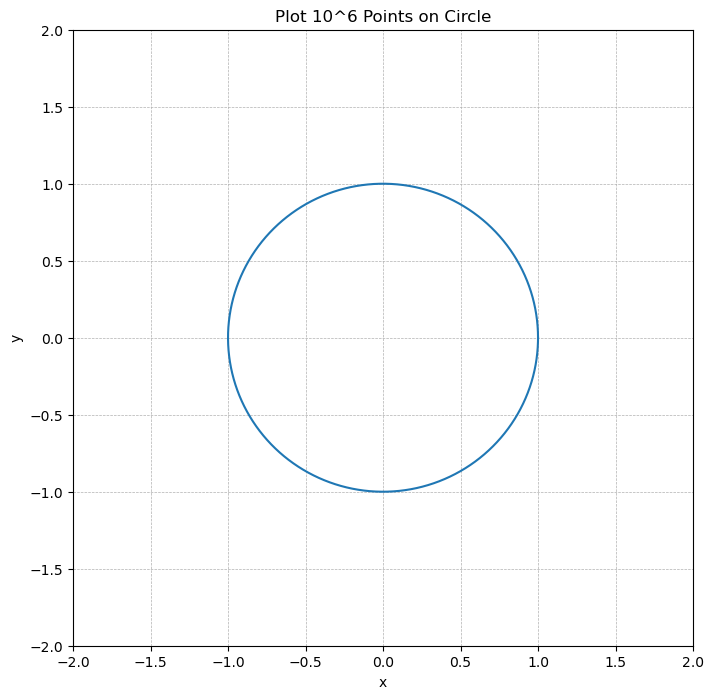

In [37]:
# Parameters
sample = 10**6         # Number of points to generate on the circle
r = 1                  # radius of circle               

#Generate points on the circle x^2 + y^2 = 1
theta = np.linspace(0, 2 * np.pi, sample, endpoint=False)
x_points = r * np.cos(theta)
y_points = r * np.sin(theta)

gridx = np.linspace(-2,2,10)
gridy = np.linspace(-2,2,10)

grid, _, _ = np.histogram2d(x_points,y_points, bins=[gridx,gridy])


plt.figure(figsize=(8, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_points,y_points,"-")
plt.title('Plot 10^6 Points on Circle')

# Draw grid lines
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

counts = grid/sample
print(counts)

plt.show()


In [38]:

#Computing the entropy
sigma = 0.05
delta_arr = []
S_arr = []
S_noise = []

for i in range(1000):
    if i < 2: continue
    d = i 
    dx = np.sqrt((16 / np.power((d-1),2)))

    noise_x = np.random.normal(0,sigma,len(x_points))
    noise_y = np.random.normal(0,sigma, len(y_points))

    gridx = np.linspace(-2,2,d)
    gridy = np.linspace(-2,2,d)

    grid, _, _ = np.histogram2d(x_points,y_points, bins=(gridx,gridy))
    grid2, _, _ = np.histogram2d(x_points+noise_x, y_points+noise_y, bins=(gridx,gridy))

    bin_counts = grid/sample
    S = bin_counts[bin_counts != 0] * np.log2(bin_counts[bin_counts !=0]) #Entropy w/o noise
    S = -1 * np.sum(S)

    bin_count2 = grid/sample # bin counts for noise 
    S2 = bin_count2[bin_count2 != 0] * np.log2(bin_count2[bin_count2 != 0])
    S2 = -1 * np.sum(S2)

    delta_arr.append(dx)
    S_arr.append(S)
    S_noise.append(S2)




In [39]:
simga = 0.05 
delta_arr2 = []
S_arr2 = []
S_noise2 = []

size = np.logspace(0.5, 3, num=50, base=10, dtype='int') + 1

for i in range(len(size)):
    n = size[i]

    noise_x = np.random.normal(0, sigma, len(x_points))
    noise_y = np.random.normal(0, sigma, len(y_points))

    gridx = np.linspace(-2,2, n)
    gridy = np.linspace(-2,2, n)

    delta_x = gridx[1] - gridx[0]

    grid, _, _ = np.histogram2d(x_points, y_points, bins=(gridx, gridy))
    grid2, _, _ = np.histogram2d(x_points+noise_x, y_points+noise_y, bins=(gridx, gridy))

    counts = grid/ sample

    S = counts[counts != 0] * np.log2(counts[counts != 0])
    S = -1 * np.sum(S)

    counts2 = grid2/sample 
    S2 = counts2[counts2 != 0] * np.log2(counts2[counts2 != 0])
    S2 = -1 * np.sum(S2)

    delta_arr2.append(delta_x)
    S_arr2.append(S)
    S_noise2.append(S2)

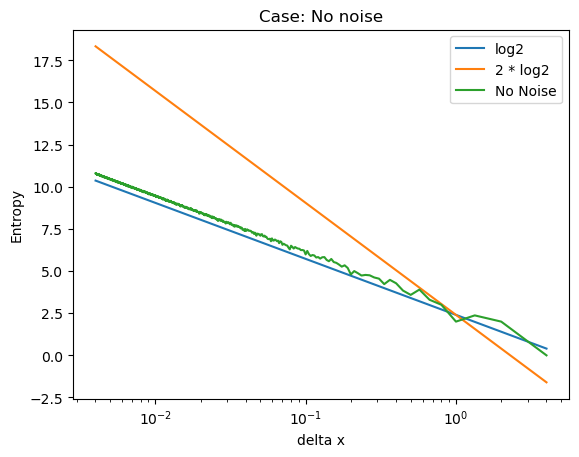

In [40]:
plt.figure()

S_cont = 2.4 

plt.plot(delta_arr, S_cont -np.log2(delta_arr), label="log2")
plt.plot(delta_arr, S_cont -2 * np.log2(delta_arr), label="2 * log2")
plt.plot(delta_arr, S_arr, label="No Noise")

plt.xlabel("delta x")
plt.ylabel('Entropy')
plt.xscale('log')
plt.title("Case: No noise")

plt.legend()
plt.show()


The signature of reduced dimensionality is when the "no noise" line tends to align with the the "log2" line, meaning that the noise resolution appears to blend in with the one-dimensional resolution case. 

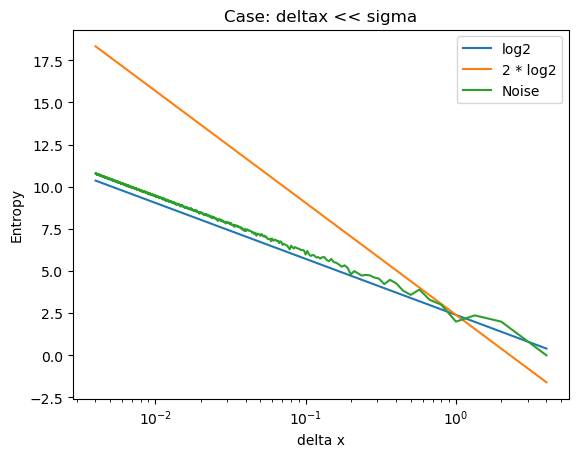

In [41]:
plt.figure()

plt.plot(delta_arr, S_cont - np.log2(delta_arr), label="log2")
plt.plot(delta_arr, S_cont -2 * np.log2(delta_arr), label="2 * log2")
plt.plot(delta_arr, S_noise, label="Noise")

plt.xscale('log')
plt.title("Case: deltax << sigma")
plt.xlabel("delta x")
plt.ylabel("Entropy")

plt.legend()
plt.show()

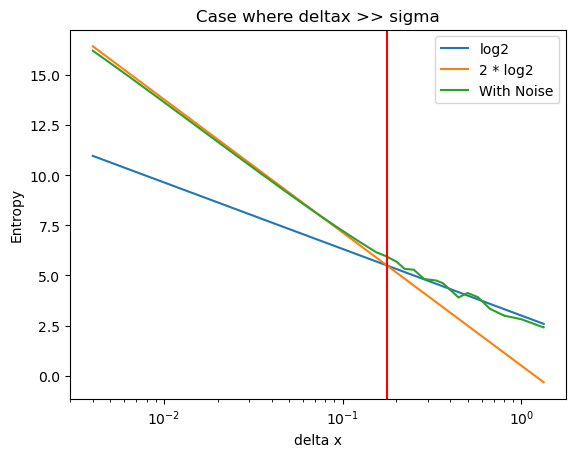

0.1767766952966369


In [42]:
plt.figure() 

S_cont2 = 0.5 
S_cont3 = 3.0 

plt.plot(delta_arr2, S_cont3 - np.log2(delta_arr2), label="log2")
plt.plot(delta_arr2, S_cont2 -2 * np.log2(delta_arr2), label="2 * log2")
plt.plot(delta_arr2, S_noise2, label = "With Noise")

plt.xscale('log')
plt.xlabel("delta x")
plt.ylabel("Entropy")
plt.axvline(np.power(2,-2.5),color="red")
plt.title("Case where deltax >> sigma")

plt.legend()
plt.show()

print(str(np.power(2,-2.5)))

Yes, you can see this transition of the S(delta_x) as it falls onto the one dimensional case of the circle distribution as depicted in the plot above. 